**Importing Necessary Libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score,roc_curve,precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats

C:\Users\COBUY\AppData\Local\Temp\ipykernel_11304\1739137336.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Loading Dataset**

In [2]:
data = pd.read_csv(r'Fraud.csv')

In [3]:
print("Shape of the Dataset = ",data.shape)

Shape of the Dataset =  (6362620, 11)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Downcasting the datatype to reduce memory consumption

In [3]:
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]=data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].astype('float32')
data[['isFlaggedFraud','isFraud']] = data[['isFlaggedFraud','isFraud']].astype('int8')
data[['step']] = data[['step']].astype('int16')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int16  
 1   type            object 
 2   amount          float32
 3   nameOrig        object 
 4   oldbalanceOrg   float32
 5   newbalanceOrig  float32
 6   nameDest        object 
 7   oldbalanceDest  float32
 8   newbalanceDest  float32
 9   isFraud         int8   
 10  isFlaggedFraud  int8   
dtypes: float32(5), int16(1), int8(2), object(3)
memory usage: 291.3+ MB


In [8]:
print("Nan Values in the dataset")
data.isnull().sum()

Nan Values in the dataset


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
print("Duplicate values in dataset ",data.duplicated().sum())

Duplicate values in dataset  0


The dataset doesnot contain any Nan and duplicate values

**EDA**

In [18]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338834e+05,8.551137e+05,1.100702e+06,1.224997e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888242e+06,2.924048e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [19]:
data.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


CASH_OUT transaction type has maximum frequency.
C1286084959 is most frequent customer who recieve money. (Investigate about this customer in futher analysis)

In [4]:
numeric_col = data.select_dtypes(exclude='object')

In [23]:
numeric_col.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


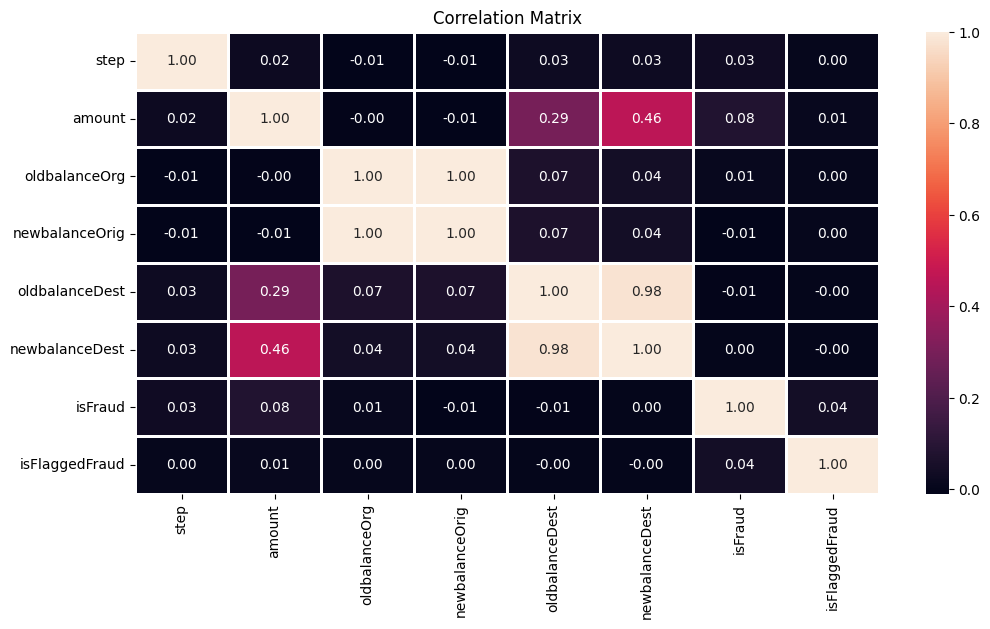

In [22]:
plt.figure(figsize=(12, 6))
plt.title('Correlation Matrix')
sns.heatmap(numeric_col.corr(), fmt='.2f',linewidths=2, annot=True)
plt.show()

Inferences :-
1- oldbalanceOrg and newbalanceOrig and good positive correlation
2- oldbalanceDest and newbalanceDest has good positive correlation
3- amount and newbalanceOrig has fair positive correlation 
4- isFlaggedFraud has alomost Zero correlation with other features

In [11]:
print("Number of Fraud and Non-Fraud Transaction")
data['isFraud'].value_counts()

Number of Fraud and Non-Fraud Transaction


isFraud
0    6354407
1       8213
Name: count, dtype: int64

Non-Fraud transaction activities is very dominating over Fraud activitites

An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [12]:
print("Number of illegal transaction attempts")
data['isFlaggedFraud'].value_counts()

Number of illegal transaction attempts


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Only 16 transcations are less then 200.000 !!!
Investigate the actual numbers

In [16]:
print("Number of transcation amount greater than 200 = ",data[data['amount']>200].shape[0])

Number of transcation amount greater than 200 =  6334309


Actually 6334309 are the illegal transaction attempts. Now it is clear that 'isFlaggedFraud' is labelled in accurately.
so, it not helpful in the our prediction model. Hence, we drop it.

In [5]:
data.drop('isFlaggedFraud',axis=1,inplace=True)

**Data Visualization**

<Axes: title={'center': 'Distribution of data in different Transaction Activities'}, xlabel='type', ylabel='count'>

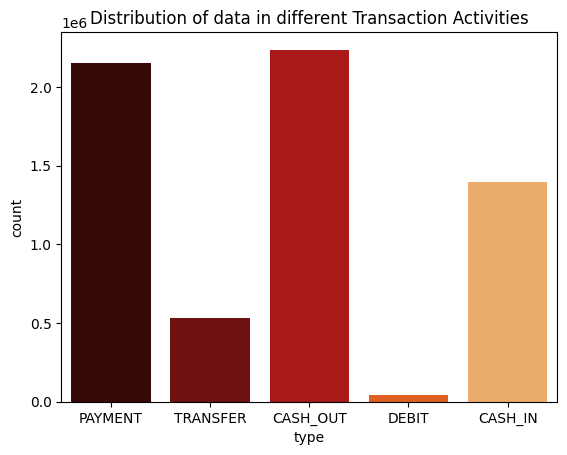

In [19]:
plt.title('Distribution of data in different Transaction Activities')
sns.countplot(data = data,x='type',hue = 'type',legend=None,palette='gist_heat')

In [24]:
pd.crosstab(data['type'], data['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


<Axes: title={'center': 'Fraudulent Transaction Activities'}, xlabel='type', ylabel='count'>

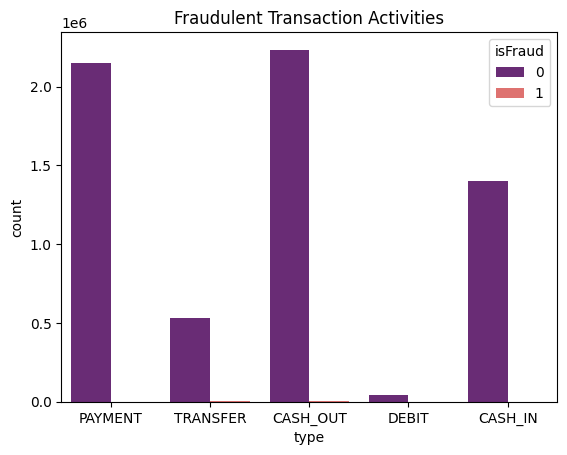

In [5]:
plt.title('Fraudulent Transaction Activities')
sns.countplot(data = data,x='type',hue = 'isFraud',palette='magma')

Fraudulent activites are in 'CASH_OUT' and 'TRANSFER' transaction activities

<Axes: title={'center': 'Distribution of Amount in Transaction type'}, xlabel='type', ylabel='amount'>

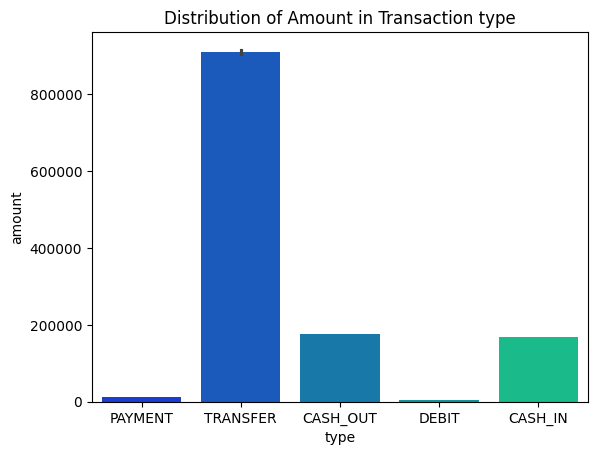

In [26]:
plt.title('Distribution of Amount in Transaction type')
sns.barplot(x='type', y='amount', data=data,palette='winter',hue='type',legend=None)

In [7]:
suspect_customer = data[data['nameDest']=='C1286084959']

In [40]:
suspect_customer.shape

(113, 10)

<Axes: title={'center': 'Distribution of data in different Transaction Activities'}, xlabel='type', ylabel='count'>

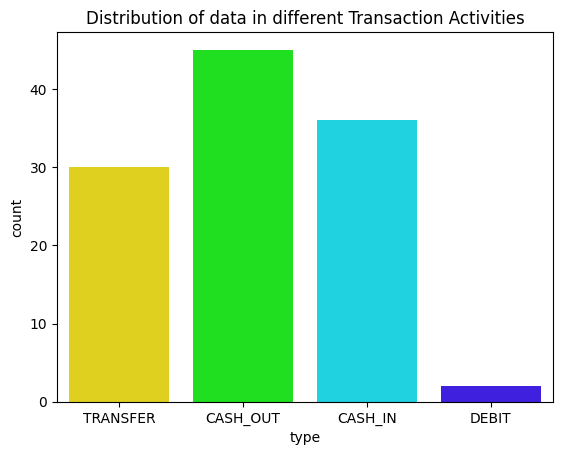

In [41]:
plt.title('Distribution of data in different Transaction Activities')
sns.countplot(data = suspect_customer,x='type',hue = 'type',legend=None,palette='gist_rainbow')

This customer involved in 'CASH_OUT' transaction activity

In [44]:
pd.crosstab(suspect_customer['type'], suspect_customer['isFraud'])

isFraud,0
type,
CASH_IN,36
CASH_OUT,45
DEBIT,2
TRANSFER,30


<Axes: title={'center': 'Fraudulent Transaction Activities of the Suspect Customer'}, xlabel='type', ylabel='count'>

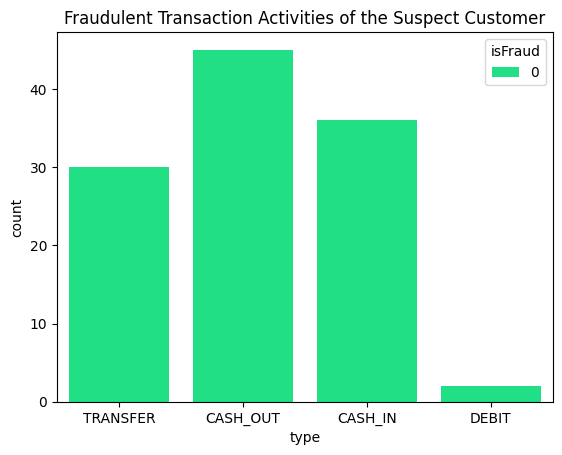

In [14]:
plt.title('Fraudulent Transaction Activities of the Suspect Customer')
sns.countplot(data = suspect_customer,x='type',hue = 'isFraud',palette='gist_rainbow_r')

From above analysis on the customer we found no activity is fraudent!

<Axes: title={'center': 'Distribution of Step'}, xlabel='step', ylabel='Count'>

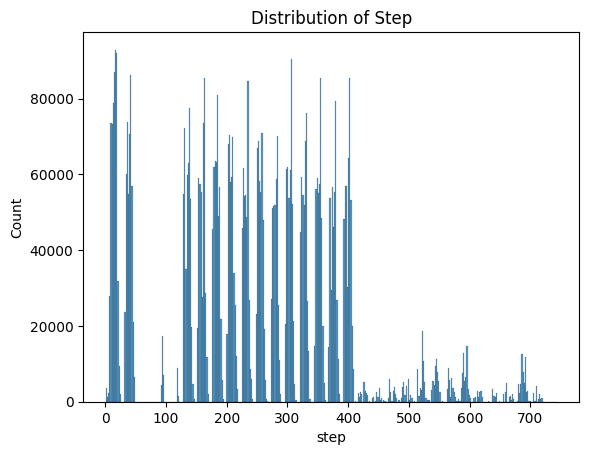

In [28]:
plt.title('Distribution of Step')
sns.histplot(data=data,x='step')

Statistical Exploration of other numeric columns

In [29]:
numeric  = data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

In [30]:
for col in numeric.columns:
    print("Skewness in the feature ",col,' = ',numeric[col].skew())

Skewness in the feature  amount  =  30.99395
Skewness in the feature  oldbalanceOrg  =  5.2491364
Skewness in the feature  newbalanceOrig  =  5.1768837
Skewness in the feature  oldbalanceDest  =  19.921757
Skewness in the feature  newbalanceDest  =  19.352303


Hence skewness of data follow the order
amount > oldbalanceDest > newbalanceDest > oldbalanceOrg > newbalanceOrig

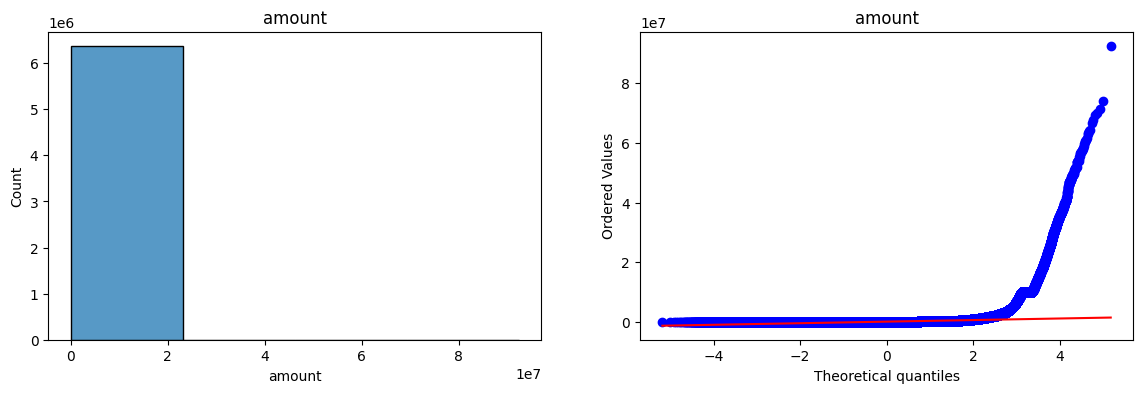

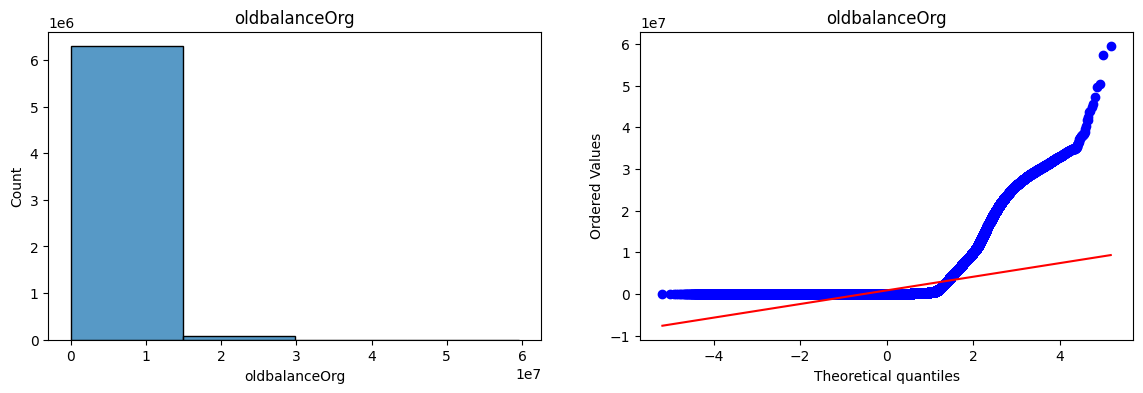

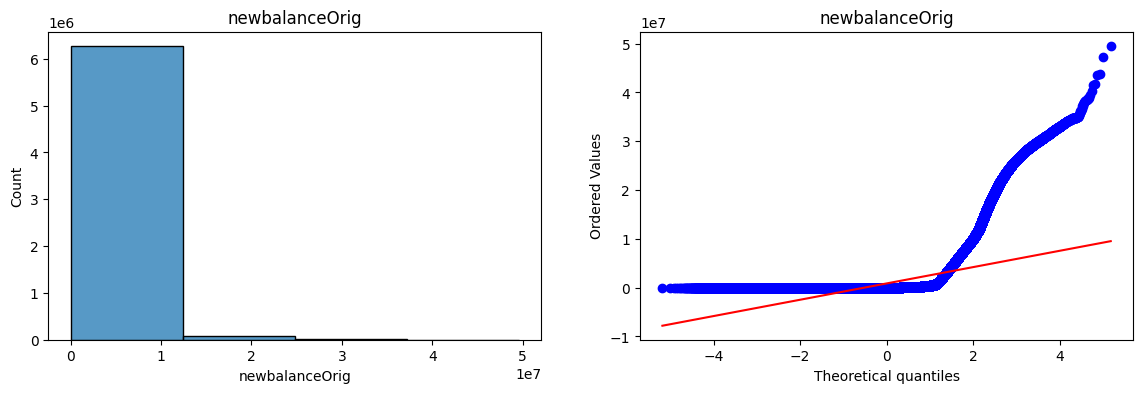

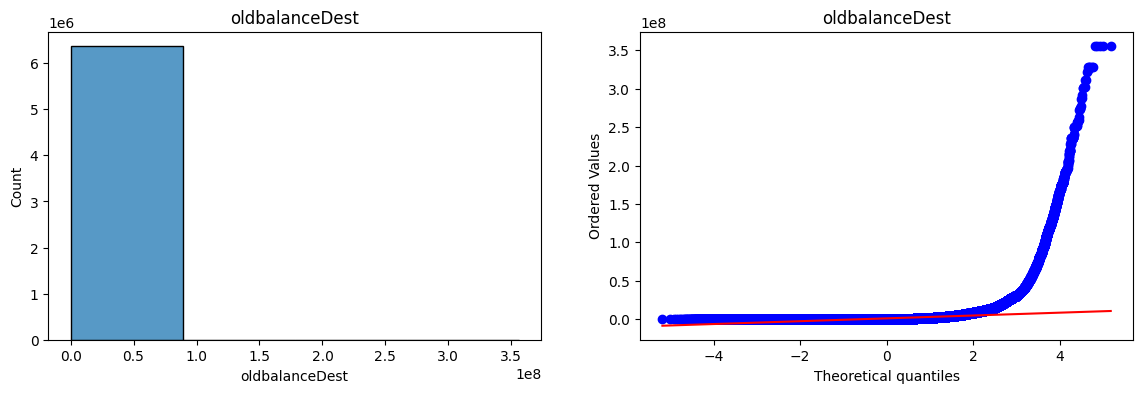

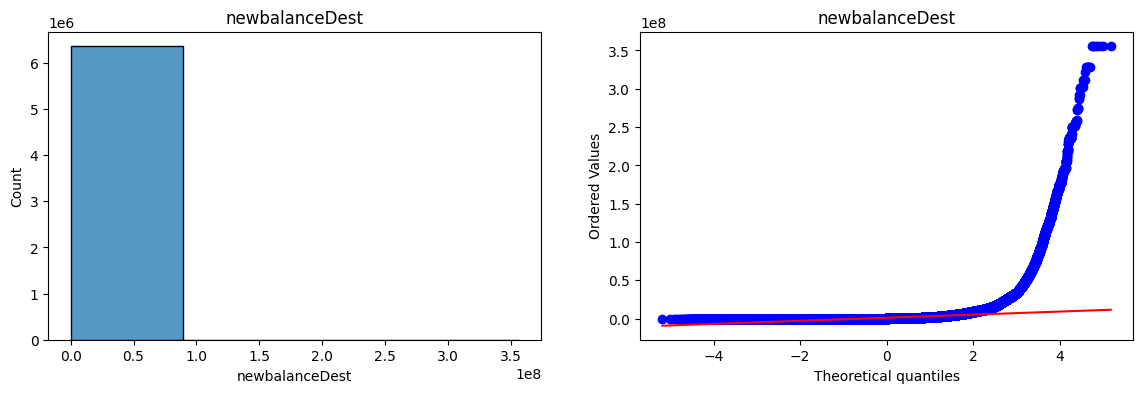

In [45]:
#Checking the distribution and how normal is the numeric features graphically
for col in numeric.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(numeric[col],bins=4)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(numeric[col],dist="norm",plot=plt)
    plt.title(col)

    plt.show()

From the graph it is clear that the numeric features are not normally distributed

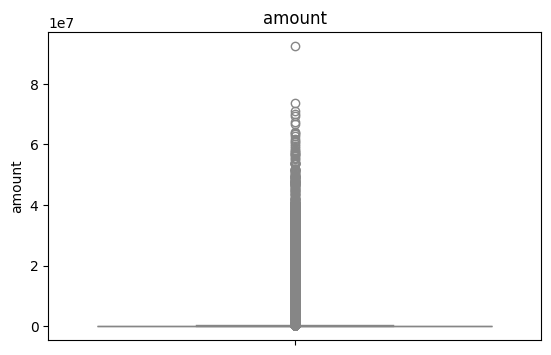

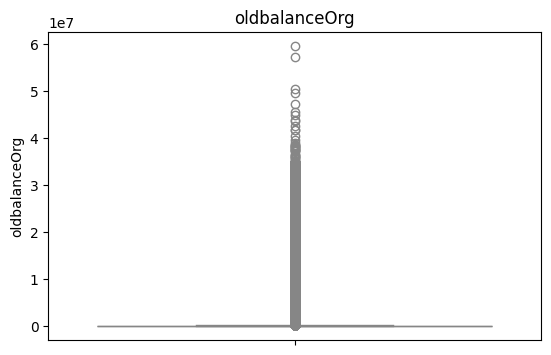

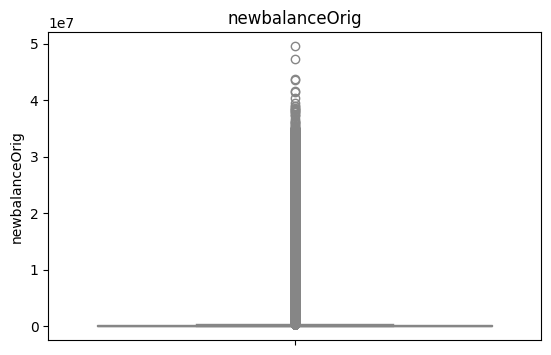

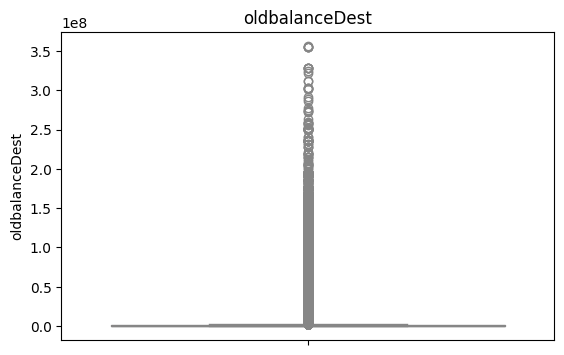

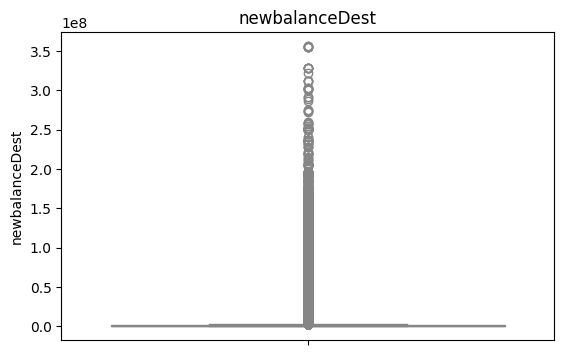

In [46]:
#Detecting Outliers 
for col in numeric.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.boxplot(numeric[col],color='pink')
    plt.title(col)
    plt.show()

Money transaction amount may vary from lower values to higher values .so,here we don't remove the outliers.

Separating features and Target variable

In [17]:
data["type"] = data["type"].replace({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

C:\Users\COBUY\AppData\Local\Temp\ipykernel_11304\1463761778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["type"] = data["type"].replace({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})


In [18]:
variables = data.drop(['nameOrig','nameDest','isFraud'],axis=1)
target = data['isFraud']

Encoding the categorical variable

In [19]:
#Splitting the test and train dataset
x_train,x_test,y_train,y_test = train_test_split(variables,target,test_size=0.2,random_state=42)

In [20]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test  = scaler.transform(x_test)

In [57]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=10),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

In [58]:
metrics = {
    'Accuracy': {},
    'F1 Score': {},
    'ROC AUC': {}
}

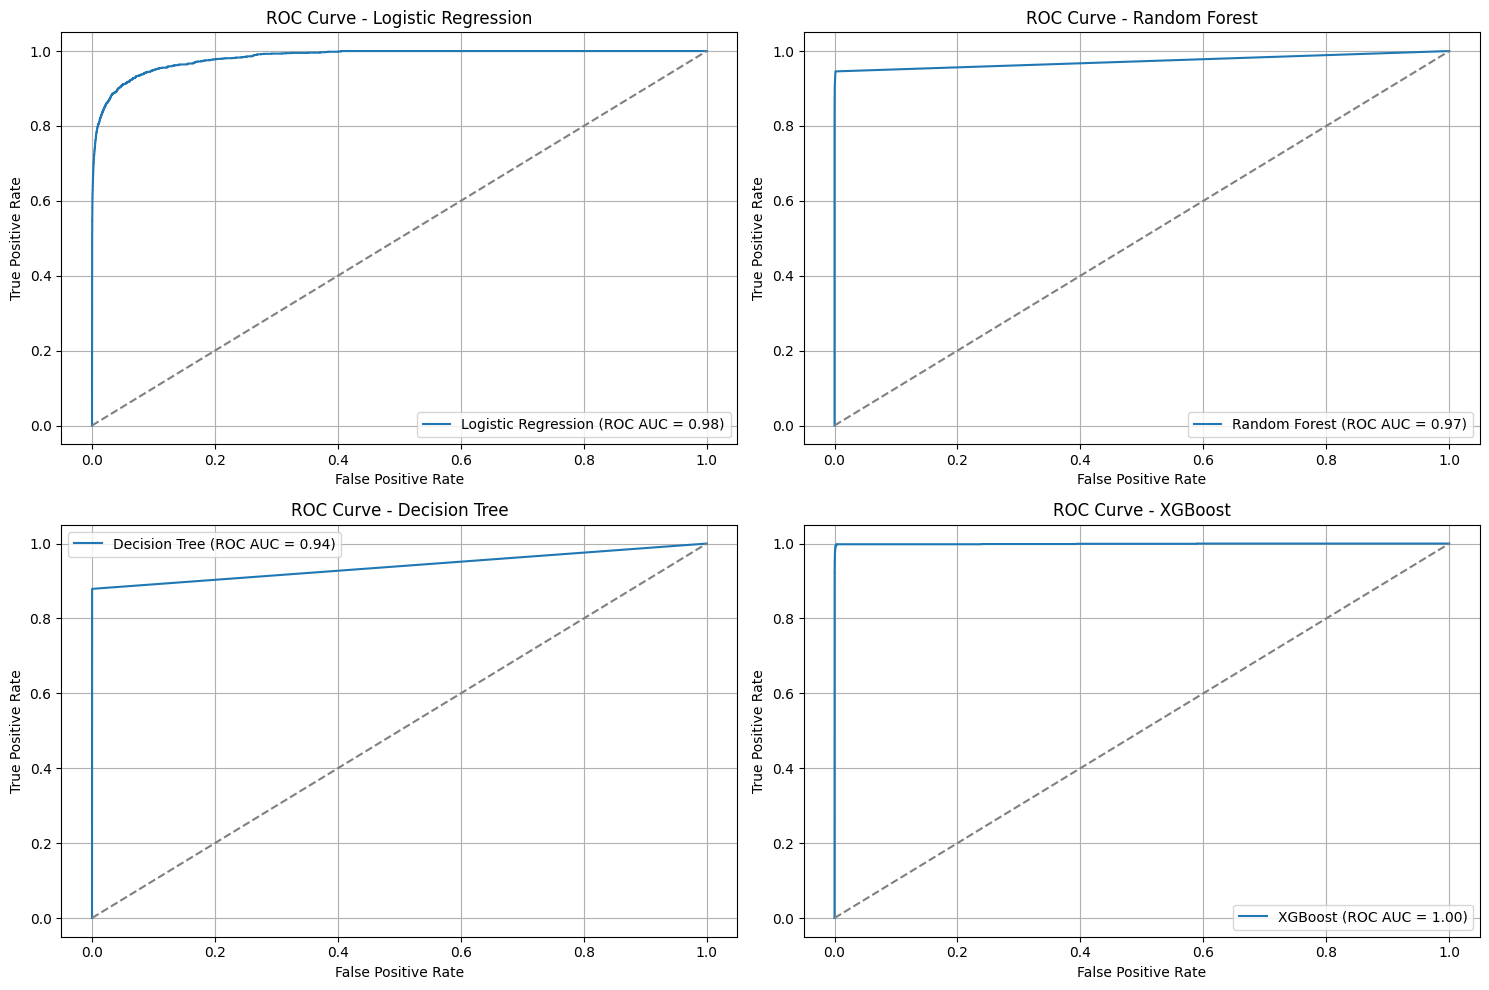

In [67]:
plt.figure(figsize=(15, 10))

# Loop through models
for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    
    # Train the model
    model.fit(scaled_x_train, y_train)
    
    # Predict probabilities for ROC curve
    y_prob = model.predict_proba(scaled_x_test)[:, 1]
    
    # Predict classes
    y_pred = model.predict(scaled_x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store metrics
    metrics['Accuracy'][model_name] = accuracy
    metrics['F1 Score'][model_name] = f1
    metrics['ROC AUC'][model_name] = roc_auc
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plot random guessing line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [68]:
print("\nEvaluation Metrics:")
for metric_name, values in metrics.items():
    print(f"\n{metric_name}:")
    for model_name, score in values.items():
        print(f"{model_name}: {score:.4f}")


Evaluation Metrics:

Accuracy:
Logistic Regression: 0.9992
Random Forest: 0.9997
Decision Tree: 0.9997
XGBoost: 0.9998

F1 Score:
Logistic Regression: 0.5759
Random Forest: 0.8709
Decision Tree: 0.8878
XGBoost: 0.9065

ROC AUC:
Logistic Regression: 0.9833
Random Forest: 0.9727
Decision Tree: 0.9394
XGBoost: 0.9992


Inferences
1- Accuracy of all the models is 99.9% this is due the overfitting as the Not-Fraud(0) dominates over Fraud(1) label
2- Although accuracy scores of all the models is 99.9% but the actual performance of the model can be depicted by 'f1 Score'
3- Poor performance of Logistic Regression model is due to the fact that the dataset contains outliers which prominently affect the model and along this highly imbalanced dataset.
4- Random Forest Classifier and Decision Tree algorithm gives great performance in classifying the labels.
5- XGBoost Algorithm gives best performance in classifying the labels.
6- ROC-AUC score of XGBoost indicating excellent discrimination ability between classes.

Preventions should company opt
1- Keep eye on the amount 'Transfer' and 'Cash_Out' as these are the more prone towards the fraudulent transaction activity.
2- Frequent transfer of money to one person or from one person is also checkable.

In [21]:
model = XGBClassifier()
model.fit(scaled_x_test,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
import pickle
pickle.dump(model,open('model.pkl','wb'))